Relativistic thin-foil electrodynamics
------------------------------------
Sergey Rykovanov

[publication](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.102.061201)


Primarily based on Bulanov et al, Phys. Plasmas 20, 123114 (2013)

We assume that a foil is delta-like. Ions are at the moment considered immobile and located at $x=0$. Laser pulse propagates from the left side $t-x$, everything is normalized in the usual relativistic laser-plasma way  ($e=1$, $m_e=1$, $c=1$, $\omega_L=1$). The model deals with the motion of the foil in the self-consistent way. Radiation from the foil itself is considered in the equations of motion. First, we start with the wave equation and its solutions in the case of the delta-foil.

$$\partial_{tt} \vec a - \partial_{xx} \vec a = -\alpha \delta(x-x_e(t)) \vec v$$

where $x_e(t)$ is the position of 1D delta-electron, $\vec v$ - its velocity, $\alpha=n_e\, d$ is the areal density of the foil with $n_e$ - assumed density and $d$ assumed thickness (for comparison with PIC simulations).

Green function for the 1D wave equation is:

$$G(t,t',x,x')=\frac{1}{2}\Theta\left(t-t'-\left|x-x'\right| \right)\mathrm{,}$$
where $\Theta(x)$ is the Heaviside step function. Using this Green function it is easy to obtain radiation produced by the motion of the electron in 1D (Lienard-Wiechert potentials analogs):

1) observer is to the left of the foil (for transverse electric field components):

$$\vec E(t,x)=\frac{\alpha}{2}\frac{\vec{v}(t^*)}{1+v_x(t^*)}$$

It is convenient to write in components:

$$E_y(t,x)=-B_z(t,x)$$
$$E_z(t,x)=B_y(t,x)$$

2) observer is to the right of the foil

$$\vec E(t,x)=\frac{\alpha}{2}\frac{\vec{v}(t^*)}{1-v_x(t^*)}$$

$$E_y(t,x)=B_z(t,x)$$
$$E_z(t,x)=-B_y(t,x)$$

Remembering that there is a laser pulse coming from the left, and that force from self-radiation is equal to the average of fields on the both sides of the foil, the total field components can be written in the following way:

$$\epsilon\equiv\frac{\alpha}{2}$$
$$E_x=R(x)$$
$$E_y=E_{y,L}+\epsilon \frac{u_y}{\gamma}\gamma_x^2$$
$$E_z=E_{z,L}+\epsilon \frac{u_z}{\gamma}\gamma_x^2$$
$$B_x=0$$
$$B_y=-E_{z,L}-\epsilon \frac{u_x u_z}{\gamma^2}\gamma_x^2$$
$$B_z=E_{y,L}+\epsilon \frac{u_x u_y}{\gamma^2}\gamma_x^2$$

Here, $R(x)$ is the model for the restoring force of the ions, typically $R(x)=\epsilon\, \mathrm{sign}(x)$, $u$ - 4-momentum components, $\gamma_x=\frac{1}{\sqrt{1-v_x^2}}$. We can now construct the usual electromagnetic tensor and use relativistic mechanics to treat electron motion:

$$\frac{du^{\mu}}{d\tau}=-F^{\mu\nu}u_{\nu}\mathrm{,}$$
where $\tau$ is the proper time. We then get:

$$\frac{d\gamma}{d\tau}=-E_xu_x-E_{y,L}u_y-E_{z,L}u_z-\epsilon\frac{\gamma_x^2}{\gamma}\left(u_y^2+u_z^2 \right)$$
$$\frac{du_x}{d\tau}=-\gamma E_x-H_{z,L}u_y+H_{y,L}u_z-\epsilon\frac{u_x\gamma_x^2}{\gamma^2}\left(u_y^2+u_z^2 \right)$$
$$\frac{du_y}{d\tau}=-E_{y,L}\left(\gamma-u_x\right) - \epsilon u_y$$
$$\frac{du_z}{d\tau}=-E_{z,L}\left(\gamma-u_x\right) - \epsilon u_z$$


New variables:

$$\xi\equiv t-x$$
$$h\equiv\gamma-u_x$$
$$u_\perp\equiv u_y^2 + u_z^2$$

Then
$$\frac{d\xi}{d\tau}=h$$

$$u_x=\gamma-h=\frac{1+u_\perp^2-h^2}{2h}$$

After some manipulations we get:

$$\frac{dh}{d\xi}=E_x-\epsilon\frac{u_\perp^2}{1+u_\perp^2}$$
$$\frac{dx}{d\xi}=\frac{1+u_\perp^2-h^2}{2h^2}$$
$$\frac{du_y}{d\xi}=-E_{y,L}-\epsilon \frac{u_y}{h}$$
$$\frac{du_z}{d\xi}=-E_{z,L}-\epsilon \frac{u_z}{h}$$

Noticing, that $\frac{u_y}{h}=\frac{dy}{d\xi}$, we get the following set of master equations:

$$h'=E_x-\epsilon \frac{u_\perp^2}{1+u_\perp^2}$$
$$x'=\frac{1+u_\perp^2-h^2}{2h^2}$$
$$y'=\frac{u_y}{h}$$
$$z'=\frac{u_z}{h}$$
$$u_y=a_{y,L}-\epsilon y$$
$$u_z=a_{z,L}-\epsilon z$$

Below we solve these equations using RK4 method (`scipy.integrate.ode`)

In [1]:
%pylab inline
#rcParams['text.usetex'] = True
#rcParams['text.latex.unicode'] = True
#rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']
import scipy.integrate
from numba import jit
import matplotlib.patches as mpatch
from matplotlib.transforms import Bbox
from matplotlib.patches import FancyBboxPatch


Populating the interactive namespace from numpy and matplotlib


In [2]:
# parameters of the model

# parameters of laser pulse components y and z
a0_y=20.0
a0_z=20.0
phase_y=0.0
phase_z=phase_y+pi/2
duration=2*2*pi
duration=4.0*2.668223
duration=4.0*2*pi
# parameters of the foil
density=400.0
thickness=0.01*2*pi
alpha=density*thickness
epsilon=alpha*0.5
print(epsilon, 4*pi)

12.566370614359174 12.566370614359172


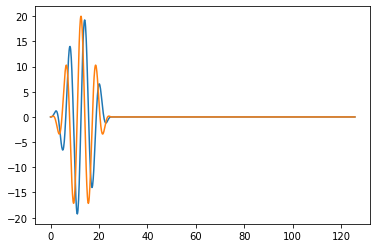

In [3]:
# pulse shapes functions
def pulse_y(xi):
    if((xi)>=0) and ((xi)<duration):
        toret = a0_y*sin(pi*(xi)/duration)**2*sin(xi-duration/2+phase_y)
    else:
        toret = 0.0
    return toret


def pulse_z(xi):
    if((xi)>=0) and ((xi)<duration):
        toret = a0_z*sin(pi*(xi)/duration)**2*sin(xi-duration/2+phase_z)
    else:
        toret = 0.0
    return toret

#@jit
#def pulse_y(xi):
#    toret=a0_y*exp(-(xi-6*duration)**2/2/duration**2)*sin(xi-duration+phase_y)
#    return toret

#@jit
#def pulse_z(xi):
#    toret=a0_z*exp(-(xi-6*duration)**2/2/duration**2)*sin(xi-duration+phase_z)
#    return toret

# check the pulse shape function

x=linspace(0,20*2*pi, 1000)
pulsey=zeros(len(x))
pulsez=zeros(len(x))

for n,xx in enumerate(x):
    #print(n,xx)
    pulsey[n]=pulse_y(xx)
    pulsez[n]=pulse_z(xx)
    
    
plot(x, pulsey)
plot(x, pulsez)
#plot(x, pulsey**2+pulsez**2)

<ipython-input-4-3cf02a4b23e2>:12: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "f" failed type inference due to: Untyped global name 'pulse_y': cannot determine Numba type of <class 'function'>

File "<ipython-input-4-3cf02a4b23e2>", line 14:
def f(y,xi):
    ay = pulse_y(xi)
    ^

  @jit
/Users/sergey/opt/anaconda3/lib/python3.7/site-packages/numba/compiler.py:742: NumbaWarning: Function "f" was compiled in object mode without forceobj=True.

File "<ipython-input-4-3cf02a4b23e2>", line 13:
@jit
def f(y,xi):
^

  self.func_ir.loc))
/Users/sergey/opt/anaconda3/lib/python3.7/site-packages/numba/compiler.py:751: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path to the object mode compilation path has been detected, this is deprecated behaviour.

For more information visit http://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit

File "<ipyt

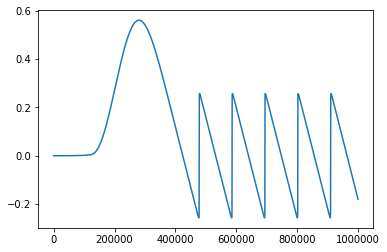

In [4]:
from scipy.integrate import odeint
from numba import jit
# for RK4 we assume:
# xi = t-x
# y0 -> h(xi)
# y1 -> x(xi)
# y2 -> y(xi)
# y3 -> z(xi)

# defining the force vector for odeint
# note that restoring force is smoothed using the tanh
@jit
def f(y,xi):
    ay = pulse_y(xi)
    az = pulse_z(xi)
    u_perp_sqr = (ay-epsilon*y[2])**2+(az-epsilon*y[3])**2
#    restoring_field=sign(y[1])
    #restoring_field=density*y[1]
    restoring_field=tanh(y[1]/(thickness/4))
    
    f0 = epsilon*(restoring_field-u_perp_sqr/(1+u_perp_sqr))
    f1 = 0.5/y[0]**2*(1-y[0]**2+u_perp_sqr)
    f2 = 1./y[0]*(ay-epsilon*y[2])
    f3 = 1./y[0]*(az-epsilon*y[3])
    return [f0,f1,f2,f3]



Time=10
Npercycle=100000
NofTS=Time*Npercycle
xi_end=Time*2*pi

xi = linspace(0, xi_end, NofTS)
dxi=xi[1]-xi[0]

y0=[1.0,0.0,0.,0.]

sol = odeint(f, y0, xi)

h=sol[:,0]
x=sol[:,1]
y=sol[:,2]
z=sol[:,3]

plot(x/2/pi)

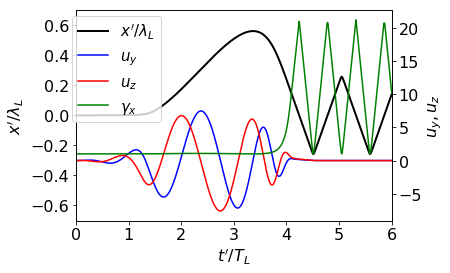

In [5]:
sw=1.

#ux=scipy.integrate.cumtrapz(x,xi)*h[1:]
#uy=scipy.integrate.cumtrapz(y,xi)*h[1:]
#uz=scipy.integrate.cumtrapz(z,xi)*h[1:]

ux=gradient(x,xi)*h
uy=gradient(y,xi)*h
uz=gradient(z,xi)*h

#plot(xi/2/pi+sw*x/2/pi, x/2/pi, 'k', lw=2, label='$x/2\pi$')
plot(xi/2/pi+sw*x/2/pi, x/2/pi, 'k', lw=2, label='$x^\prime/\lambda_L$')
ylim(-0.7,0.7)
#plot(xi/2/pi+sw*x/2/pi, y/2/pi)
xticks(fontsize=16)
yticks(fontsize=16)
xlabel('$t^\prime/T_L$', fontsize=16)
ylabel('$x^\prime/\lambda_L$', fontsize=16)
ax1=gca()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

#color = 'tab:blue'
#ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
#ax2.plot(t, data2, color=color)
#ax2.tick_params(axis='y', labelcolor=color)
plot(xi/2/pi+sw*x/2/pi, uy, 'b', label='$u_y$')
plot(xi/2/pi+sw*x/2/pi, uz, 'r', label='$u_z$')
#plot(xi[1:]/2/pi+sw*x[1:]/2/pi, ux)
#plot(ux)
xlim(0,6)
#ylim(-20,20)
gamma=sqrt(1+ux**2+uy**2+uz**2)
vx = ux/gamma
gamma_x=1./sqrt(1-vx**2)
#plot(gamma)
#plot(xi/2/pi+sw*x/2/pi, gamma_x)
gamma_x=1./sqrt(1-vx**2)
#plot(gamma)
plot(xi/2/pi+sw*x/2/pi, gamma_x, 'g', label='$\gamma_x$')
ylabel('$u_y,u_z$', fontsize=16)
xticks(fontsize=16)
yticks(fontsize=16)

fig=gcf()
fig.legend(loc=2, fontsize=15,bbox_to_anchor=(0.15, 0.42, 0.79, 0.5))
#tight_layout()  # otherwise the right y-label is slightly clipped
#plt.show()


subplots_adjust(left=0.15, bottom=0.15, right=0.88)
savefig('model_cp_atto.pdf', dpi=150)

save('t_model', xi+x)
save('x_model', x)



Text(0, 0.5, '$u_x$')

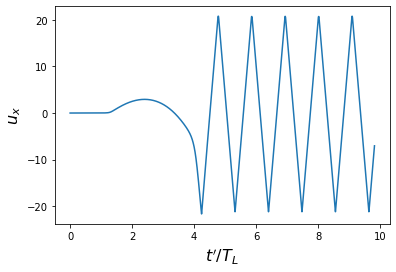

In [12]:
plot(xi/2/pi+sw*x/2/pi, ux)
xlabel('$t^\prime/T_L$', fontsize=16)
ylabel('$u_x$', fontsize=16)

In [6]:
!open model_cp_atto.pdf
!cp model_cp_atto.pdf /Users/sleepyhead/Desktop/Library/My_Papers/Slingshot_2019/model_x_u.pdf

cp: /Users/sleepyhead/Desktop/Library/My_Papers/Slingshot_2019/model_x_u.pdf: No such file or directory


-1.0101268894553182e-35 -1.431504183170593e-35


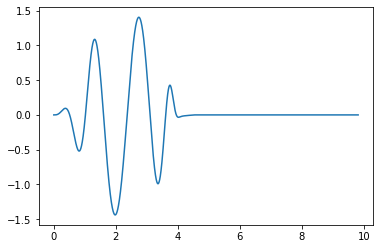

In [6]:
t=xi+x
plot(t/2/pi, y)
print(y[-1], z[-1])
#z[-1]

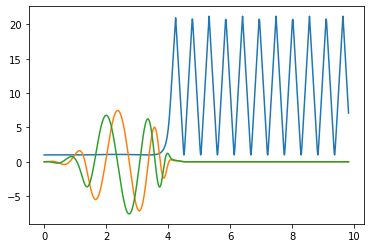

In [7]:
gamma=sqrt(1+ux**2+uy**2+uz**2)
vx = ux/gamma
gamma_x=1./sqrt(1-vx**2)
#plot(gamma)
plot(xi/2/pi+sw*x/2/pi, gamma_x)
#plot(ux)
#plot(xi/2/pi+sw*x/2/pi, vx)

plot(xi/2/pi+sw*x/2/pi, uy)
plot(xi/2/pi+sw*x/2/pi, uz)
#ylim(-10,10)

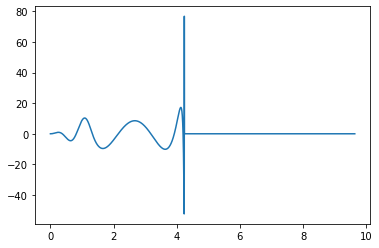

In [8]:
#xi
#x
t=xi+x

tdetector = t+x

Eydetector = epsilon*uy/gamma/(1+vx)
Ezdetector = epsilon*uz/gamma/(1+vx)

#plot(tdetector/2/pi, Eydetector)
#plot(tdetector/2/pi, Ezdetector)

#plot(t/2/pi, Eydetector)

Ey_interp=interp(t, tdetector, Eydetector)
Ez_interp=interp(t, tdetector, Ezdetector)


plot(tdetector/2/pi, Eydetector)
#plot(tdetector/2/pi, Ezdetector)

#plot(t/2/pi, Ey_interp)


(0.01, 1)

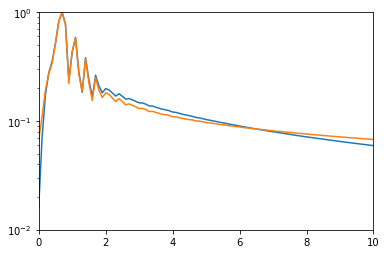

In [9]:
sp_y=fft.fft(Ey_interp)
sp_z=fft.fft(Ez_interp)

w=fft.fftfreq(len(Ey_interp), d=t[1]-t[0])

semilogy(w*2*pi,abs(sp_y)/amax(abs(sp_y)))
semilogy(w*2*pi,abs(sp_z)/amax(abs(sp_z)))
xlim(0,10)
ylim(1e-2,1)

(0.001, 1)

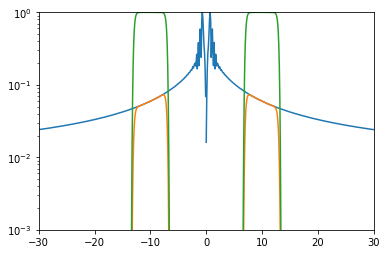

In [10]:
filter_center=10.0
filter_width=3.
bandgap_filter_minus=exp(-(w*2*pi-filter_center)**16/filter_width**16)
bandgap_filter_plus=exp(-(w*2*pi+filter_center)**16/filter_width**16)
bandgap_filter=bandgap_filter_minus+bandgap_filter_plus
semilogy(w*2*pi, abs(sp_y)/amax(abs(sp_y)))
semilogy(w*2*pi, abs(bandgap_filter*sp_y)/amax(abs(sp_y)))
semilogy(w*2*pi, bandgap_filter)

sp_y_filt = bandgap_filter*sp_y
sp_z_filt = bandgap_filter*sp_z
xlim(-30,30)
ylim(1e-3,1)

(0, 30)

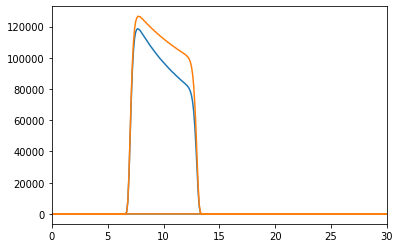

In [11]:
plot(w*2*pi, abs(sp_y_filt))
plot(w*2*pi, abs(sp_z_filt))
xlim(0,30)

In [12]:
filtered_y=fft.ifft(sp_y_filt)
filtered_z=fft.ifft(sp_z_filt)



/Users/sergey/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(-15, 15)

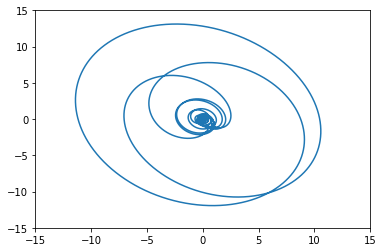

In [13]:
plot(filtered_y, filtered_z)

xlim(-15,15)
ylim(-15,15)


/Users/sergey/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/sergey/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/sergey/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


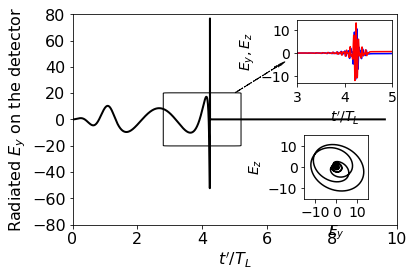

In [15]:
plot(tdetector/2/pi, Eydetector, 'k', lw=2)

#plot(t/2/pi, filtered_y*1)
#plot(t/2/pi, filtered_z*1)
xlim(0,10)
ylim(-80,80)

xticks(fontsize=16)
yticks(fontsize=16)

ylabel('Radiated $E_y$ on the detector', fontsize=16)
xlabel('$t^\prime/T_L$', fontsize=16)

gca().arrow(5, 20, 1.3, 20, head_width=0.15, head_length=4, fc='k', 
            ec='k', linestyle='-.')

rect = Rectangle((3, -20), 2, 40, facecolor="w")
gca().add_patch(rect)
bb = Bbox.from_bounds(3, -20, 2, 40)

p_fancy = FancyBboxPatch((bb.xmin, bb.ymin),
                             abs(bb.width), abs(bb.height),
                             boxstyle="round,pad=0.1",
                             mutation_scale=2.,
                             fc=(1., 1, 1.),
                             ec=(0., 0., 0.))

gca().add_patch(p_fancy)



a = plt.axes([0.67, 0.64, .22, .22], facecolor='w')
plt.plot(t/2/pi, filtered_y, 'b')
plt.plot(t/2/pi, filtered_z, 'r')
#plt.title('Filtered field')
plt.xlim(3, 5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
xlabel('$t^\prime/T_L$', fontsize=14)
ylabel('$E_y, E_z$', fontsize=14)


#plt.xticks([])
#plt.yticks([])

a = plt.axes([0.65, 0.24, .22, .22], facecolor='w')
a.set_aspect(aspect=1.0)
plt.plot(filtered_z, filtered_y, 'k')
#plt.title('Filtered field')
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

xlabel('$E_y$', fontsize=14)
ylabel('$E_z$', fontsize=14)

subplots_adjust(left=0.15, bottom=0.15)
savefig('model_radiation.pdf', dpi=150)


In [ ]:
!open model_radiation.pdf
!cp model_radiation.pdf /Users/sleepyhead/Desktop/Library/My_Papers/Slingshot_2019/

In [ ]:
log(2)

In [ ]:
1/8/pi**2

In [ ]:
plt.plot(t/2/pi, (filtered_y+filtered_z)**2, 'b')
#plt.plot(t/2/pi, filtered_z, 'r')

xlim(4,4.4)

In [ ]:
### Stokes parameters and ellipticity
spy=sp_y_filt
spz=sp_z_filt

S0=spy*conjugate(spy)+spz*conjugate(spz)
S1=spy*conjugate(spy)-spz*conjugate(spz)
S2=2*real(spy*conjugate(spz))
S3=2*imag(spy*conjugate(spz))

V=sqrt(S1**2+S2**2+S3**2)/S0

chi=0.5*arctan(S3/sqrt(S1**2+S2**2))
plot(w*2*pi, abs(tan(chi)))
xlim(0,20)

w[131]*2*pi

mean(tan(chi[71:131]))
plot(w*2*pi,V)

In [ ]:
a1  vector potential  

a2  vector potential



a1**2+(2*a2)**2 = const

